# 참고자료



In [ ]:
!pip install --upgrade git+https://github.com/Kitsunetic/torch_burn.git

In [2]:
from multiprocessing import cpu_count
from pathlib import Path
from typing import List, Union, AnyStr
from math import pi
import pickle

import numpy as np
import torch
import torch.nn as nn
from sklearn import model_selection
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

import torch_burn as tb
import utils

# Hyper Parameters

In [3]:
EXPERIMENT_NAME = 'baseline - LSTM'
CHECKPOINT_DIR = Path('checkpoint', EXPERIMENT_NAME)
CHECKPOINT_DIR.mkdir(parents=True, exist_ok=True)

DATA_FILEPATH = 'data/pth_nostd/C2-T18-win48-hop1.pth'

NUM_EPOCHS = 40
BATCH_SIZE = 1024

# 데이터 로드

In [4]:
train_ds, test_ds = utils.SequentialDataset.load_data(DATA_FILEPATH)

In [5]:
len(train_ds), len(test_ds)

(177937, 176476)

In [7]:
x = train_ds[0][0]

In [8]:
x.shape

torch.Size([48, 6])

In [10]:
import matplotlib.pyplot as plt

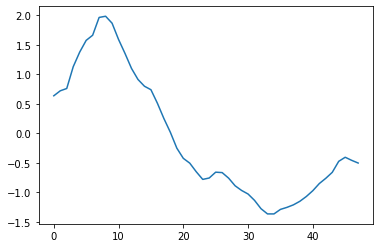

In [41]:
plt.plot(x[:, 0])

# 모델, loss, optim, metrics, callbacks 생성

In [5]:
model = utils.BaselineLSTM(input_size=6,
                           hidden_size=24,
                           num_layers=8,
                           dropout=0.0,
                           bidirectional=False).cuda()

In [6]:
criterion = nn.MSELoss().cuda()
optimizer = torch.optim.Adam(model.parameters())

In [7]:
metrics = [tb.metrics.ModuleMetric(criterion, 'loss'),
           utils.HPMetric('hp_metric'),
           utils.HPSignalHistory(CHECKPOINT_DIR / 'sample' / '{epoch:04d}.npy', 'hp_signal')]

In [8]:
callbacks = [tb.callbacks.EarlyStopping(metrics[0])]

In [9]:
trainer = tb.Trainer2(model=model, optim=optimizer, metrics=metrics, callbacks=callbacks, ncols=100)

In [10]:
trainer.fit(train_ds, test_ds, num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

[0002/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   3.902519
 - Pitch        :   8.644802
 - Roll         :   2.890002
 - RMS          :   5.724636
 - 99% Tile     :  24.952851
Save output signals into checkpoint/baseline - LSTM/sample/0001.npy


[0003/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   3.162232
 - Pitch        :   8.126757
 - Roll         :   2.884489
 - RMS          :   5.302960
 - 99% Tile     :  23.545605
Save output signals into checkpoint/baseline - LSTM/sample/0002.npy


[0004/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.794127
 - Pitch        :   2.784250
 - Roll         :   2.929315
 - RMS          :   2.836669
 - 99% Tile     :  17.896189
Save output signals into checkpoint/baseline - LSTM/sample/0003.npy


[0005/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.451245
 - Pitch        :   2.306886
 - Roll         :   2.867329
 - RMS          :   2.552901
 - 99% Tile     :  15.955206
Save output signals into checkpoint/baseline - LSTM/sample/0004.npy


[0006/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.518165
 - Pitch        :   2.082618
 - Roll         :   2.902688
 - RMS          :   2.523493
 - 99% Tile     :  15.492136
Save output signals into checkpoint/baseline - LSTM/sample/0005.npy


[0007/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.545004
 - Pitch        :   1.686556
 - Roll         :   2.841906
 - RMS          :   2.408177
 - 99% Tile     :  14.928361
Save output signals into checkpoint/baseline - LSTM/sample/0006.npy


[0008/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.377361
 - Pitch        :   1.700014
 - Roll         :   2.883315
 - RMS          :   2.370330
 - 99% Tile     :  14.953333
Save output signals into checkpoint/baseline - LSTM/sample/0007.npy


[0009/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.348146
 - Pitch        :   2.134727
 - Roll         :   2.662526
 - RMS          :   2.391645
 - 99% Tile     :  14.270286
Save output signals into checkpoint/baseline - LSTM/sample/0008.npy


[0010/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.172170
 - Pitch        :   1.495116
 - Roll         :   1.521587
 - RMS          :   1.757737
 - 99% Tile     :  12.995347
Save output signals into checkpoint/baseline - LSTM/sample/0009.npy


[0011/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.172912
 - Pitch        :   1.997535
 - Roll         :   1.469795
 - RMS          :   1.903680
 - 99% Tile     :  12.954421
Save output signals into checkpoint/baseline - LSTM/sample/0010.npy


[0012/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.120623
 - Pitch        :   1.396694
 - Roll         :   1.328197
 - RMS          :   1.654479
 - 99% Tile     :  12.478998
Save output signals into checkpoint/baseline - LSTM/sample/0011.npy


[0013/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.681692
 - Pitch        :   1.543214
 - Roll         :   1.297635
 - RMS          :   1.937080
 - 99% Tile     :  12.297960
Save output signals into checkpoint/baseline - LSTM/sample/0012.npy


[0014/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.001264
 - Pitch        :   1.588562
 - Roll         :   1.295499
 - RMS          :   1.653975
 - 99% Tile     :  12.081827
Save output signals into checkpoint/baseline - LSTM/sample/0013.npy


[0014/0040] Validation: 100%|████████████████████| 173/173 [00:02<00:00, 80.77it/s, val_loss 0.0027]


val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.178621
 - Pitch        :   1.711394
 - Roll         :   1.198349
 - RMS          :   1.742728
 - 99% Tile     :  12.053771
Save output signals into checkpoint/baseline - LSTM/sample/0014.npy


[0016/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   2.059866
 - Pitch        :   1.335568
 - Roll         :   1.267191
 - RMS          :   1.595051
 - 99% Tile     :  11.851363
Save output signals into checkpoint/baseline - LSTM/sample/0015.npy


[0017/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.965330
 - Pitch        :   1.336462
 - Roll         :   1.108832
 - RMS          :   1.514173
 - 99% Tile     :  11.686690
Save output signals into checkpoint/baseline - LSTM/sample/0016.npy


[0018/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.096617
 - Pitch        :   1.636771
 - Roll         :   1.108354
 - RMS          :   1.663658
 - 99% Tile     :  11.573153
Save output signals into checkpoint/baseline - LSTM/sample/0017.npy


[0019/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.977240
 - Pitch        :   1.311919
 - Roll         :   1.037550
 - RMS          :   1.495228
 - 99% Tile     :  11.404408
Save output signals into checkpoint/baseline - LSTM/sample/0018.npy


[0020/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.451428
 - Pitch        :   1.255433
 - Roll         :   1.651045
 - RMS          :   1.853965
 - 99% Tile     :  11.453582
Save output signals into checkpoint/baseline - LSTM/sample/0019.npy


[0021/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.894604
 - Pitch        :   1.301289
 - Roll         :   1.014803
 - RMS          :   1.450598
 - 99% Tile     :  11.291829
Save output signals into checkpoint/baseline - LSTM/sample/0020.npy


[0022/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.011297
 - Pitch        :   1.626486
 - Roll         :   0.988235
 - RMS          :   1.598685
 - 99% Tile     :  11.216776
Save output signals into checkpoint/baseline - LSTM/sample/0021.npy


[0023/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   2.224334
 - Pitch        :   1.474828
 - Roll         :   0.995437
 - RMS          :   1.644554
 - 99% Tile     :  11.257662
Save output signals into checkpoint/baseline - LSTM/sample/0022.npy


[0024/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 3 epochs
                  validation
 - Yaw          :   2.401597
 - Pitch        :   1.271406
 - Roll         :   1.480860
 - RMS          :   1.786718
 - 99% Tile     :  11.133856
Save output signals into checkpoint/baseline - LSTM/sample/0023.npy


[0025/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.977914
 - Pitch        :   1.249951
 - Roll         :   0.962865
 - RMS          :   1.460779
 - 99% Tile     :  11.005434
Save output signals into checkpoint/baseline - LSTM/sample/0024.npy


[0026/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   1.897422
 - Pitch        :   1.301402
 - Roll         :   0.980971
 - RMS          :   1.444087
 - 99% Tile     :  11.049957
Save output signals into checkpoint/baseline - LSTM/sample/0025.npy


[0027/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   2.463493
 - Pitch        :   1.473715
 - Roll         :   0.937875
 - RMS          :   1.743583
 - 99% Tile     :  11.090125
Save output signals into checkpoint/baseline - LSTM/sample/0026.npy


[0028/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.917288
 - Pitch        :   1.151483
 - Roll         :   0.971882
 - RMS          :   1.407890
 - 99% Tile     :  10.759744
Save output signals into checkpoint/baseline - LSTM/sample/0027.npy


[0029/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   1.931248
 - Pitch        :   1.192858
 - Roll         :   1.016427
 - RMS          :   1.435937
 - 99% Tile     :  10.814736
Save output signals into checkpoint/baseline - LSTM/sample/0028.npy


[0030/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.854841
 - Pitch        :   1.192970
 - Roll         :   0.900229
 - RMS          :   1.375260
 - 99% Tile     :  10.711842
Save output signals into checkpoint/baseline - LSTM/sample/0029.npy


[0031/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.941597
 - Pitch        :   1.164014
 - Roll         :   0.909963
 - RMS          :   1.408636
 - 99% Tile     :  10.723364
Save output signals into checkpoint/baseline - LSTM/sample/0030.npy


[0032/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   2.028414
 - Pitch        :   1.495302
 - Roll         :   0.902008
 - RMS          :   1.545316
 - 99% Tile     :  10.768605
Save output signals into checkpoint/baseline - LSTM/sample/0031.npy


[0033/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   2.012346
 - Pitch        :   1.596074
 - Roll         :   0.873680
 - RMS          :   1.566344
 - 99% Tile     :  10.672697
Save output signals into checkpoint/baseline - LSTM/sample/0032.npy


[0034/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.839992
 - Pitch        :   1.257791
 - Roll         :   0.902734
 - RMS          :   1.388349
 - 99% Tile     :  10.686631
Save output signals into checkpoint/baseline - LSTM/sample/0033.npy


[0035/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   1.923562
 - Pitch        :   1.317244
 - Roll         :   0.894697
 - RMS          :   1.441724
 - 99% Tile     :  10.533907
Save output signals into checkpoint/baseline - LSTM/sample/0034.npy


[0036/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   2.128670
 - Pitch        :   1.218965
 - Roll         :   0.892733
 - RMS          :   1.507103
 - 99% Tile     :  10.588251
Save output signals into checkpoint/baseline - LSTM/sample/0035.npy


[0037/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.928724
 - Pitch        :   1.180074
 - Roll         :   0.951690
 - RMS          :   1.416365
 - 99% Tile     :  10.554837
Save output signals into checkpoint/baseline - LSTM/sample/0036.npy


[0038/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   1.914078
 - Pitch        :   1.169198
 - Roll         :   1.007671
 - RMS          :   1.419639
 - 99% Tile     :  10.502626
Save output signals into checkpoint/baseline - LSTM/sample/0037.npy


[0039/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

val_loss is not improved for 2 epochs
                  validation
 - Yaw          :   1.941297
 - Pitch        :   1.242549
 - Roll         :   0.995209
 - RMS          :   1.449483
 - 99% Tile     :  10.657853
Save output signals into checkpoint/baseline - LSTM/sample/0038.npy


[0040/0040] Train:   0%|                                                    | 0/174 [00:00<?, ?it/s]

                  validation
 - Yaw          :   1.902541
 - Pitch        :   1.139462
 - Roll         :   0.945838
 - RMS          :   1.391958
 - 99% Tile     :  10.557571
Save output signals into checkpoint/baseline - LSTM/sample/0039.npy


[0040/0040] Validation: 100%|████████████████████| 173/173 [00:02<00:00, 82.00it/s, val_loss 0.0022]

val_loss is not improved for 1 epochs
                  validation
 - Yaw          :   1.982572
 - Pitch        :   1.711753
 - Roll         :   0.926079
 - RMS          :   1.603986
 - 99% Tile     :  10.624943
Save output signals into checkpoint/baseline - LSTM/sample/0040.npy
